# OUTLIERS

Para este cuaderno utilizaremos un nuevo dataset con columnas añadidas

Sigue habiendo datos faltantes y NaN, esto nos sirve de repaso

#Definicion de outliers

Los outliers en nuestro dataset serán los valores que se **“escapan al rango en donde se concentran la mayoría de muestras”**

¿Y por qué nos interesa detectar esos Outliers? Por que pueden afectar considerablemente a los resultados que pueda obtener un modelo de Machine Learning… Para mal… ó para bien! Por eso hay que detectarlos, y tenerlos en cuenta. Por ejemplo en Regresión Lineal ó algoritmos de Ensamble puede tener un impacto negativo en sus predicciones.

Los Outliers pueden significar varias cosas:

*   ERROR: Si tenemos un grupo de “edades de personas” y tenemos una persona con 160 años, seguramente sea un error de carga de datos. En este caso, la detección de outliers nos ayuda a detectar errores.
*   LIMITES: En otros casos, podemos tener valores que se escapan del “grupo medio”, pero queremos mantener el dato modificado, para que no perjudique al aprendizaje del modelo de ML.
*   PUNTO DE INTERES: puede que sean los casos “anómalos” los que queremos detectar y que sean nuestro objetivo (y no nuestro enemigo!)

In [ ]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
pio.renderers.default='browser'

### SIEMPRE VER EL CONTENIDO DE NUESTRO DATAFRAME



In [ ]:
# Traer el CSV y ver la informacion relevante

df_eda = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Datos/EDA_02.csv', sep=",", na_values=' ?')
# despues del separador podemos añadir header= None, para decir que este dataframe no tiene cabecera
# tamien podemos añadir na_values=' ?' para indicar que si encuetra ese caracter lo tome como NaN

# la informacion relevante para un inicio y primera toma de contacto

print('Dimensiones del df:', df_eda.shape)
print()
# Mostrar el encabezado (primeras 3 filas)
print("Encabezado del dataset:")
display(df_eda.head(3))
print()
# Mostrar 3 filas al azar
print("\n3 filas al azar del dataset:")
display(df_eda.sample(3))
print()
# Mostrar la cola (últimas 3 filas)
print("\nCola del dataset:")
display(df_eda.tail(3))
print()
print("con info")
df_eda.info()

Dimensiones del df: (58, 19)

Encabezado del dataset:


,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion
0,1,Alejandro,García,Navarro,631 456 789,9,hombre,Malo,Bajo,Sí,Secundaria,158,190,restaurante,Tradicional,1,0,9,sedentaria
1,2,Mariana,Rodríguez,Reyes,55 1234 5678,22,mujer,Normal,Medio,No,Primaria,162,139,trabajo,Pizza,1,0,10,sedentaria
2,3,Carlos,Martínez,Romero,213 987 6543,25,hombre,Excelente,Alto,Sí,Universitaria,175,121,restaurante,Vegetariana,1,1,6,activo




3 filas al azar del dataset:


,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion
21,22,Ricardo,Rivera,Acosta,151 234 56789,51,hombre,Normal,Medio,No,Postgrado,159,127,casa,Pizza,1,0,9,estresante
31,31,Fernanda,Pérez,Etxebarria,645 321 098,71,mujer,Otro,Alto,Sí,Secundaria,184,173,trabajo,Pizza,1,1,4,estresante
29,29,Isabel,Martínez,Salazar,612 345 678,18,mujer,NaN,Bajo,Sí,NaN,230,134,trabajo,Hamburguesa,0,1,10,estresante




Cola del dataset:


,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion
55,56,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria,186,125,trabajo,Arabe,1,1,10,estresante
56,57,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria,161,124,restaurante,Italiana,1,1,12,estresante
57,58,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria,164,196,casa,Tradicional,0,1,12,sedentaria



con info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id cliente    58 non-null     int64 
 1   nombre        58 non-null     object
 2   apellido1     58 non-null     object
 3   apellido2     58 non-null     object
 4   telefono      58 non-null     object
 5   edad          58 non-null     int64 
 6   sexo          54 non-null     object
 7   estado salud  51 non-null     object
 8   ingresos      55 non-null     object
 9   deporte       55 non-null     object
 10  educacion     54 non-null     object
 11  altura        58 non-null     int64 
 12  peso          58 non-null     int64 
 13  lugar_comida  58 non-null     object
 14  tipo_comida   58 non-null     object
 15  alcohol       58 non-null     int64 
 16  tabaco        58 non-null     int64 
 17  horas_sueño   58 non-null     int64 
 18  ocupacion     58 non-null     object
dtype

##Limpieza

Ya vimos que hay columnas que podemos quitar ya que no aportan informacion.

Estas son las de ID cliente, nombre, apellidos, telefono.

Pasamos a eliminarlas

In [ ]:
# Eliminar las columnas innecesarias del DataFrame
# las vamos a almacenar en un dataframe nuevo

df_02 = df_eda.drop(columns=['id cliente', 'nombre', 'apellido1', 'apellido2', 'telefono'], axis=1)
# df_02 contiene el nuevo DataFrame

print("****************eliminadas las columnas innecesarias***********************")

# Mostrar las primeras 5 filas del DataFrame modificado
print("\nDespués de eliminar columnas:\n")
print(df_02.info())

****************eliminadas las columnas innecesarias***********************

Después de eliminar columnas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   edad          58 non-null     int64 
 1   sexo          54 non-null     object
 2   estado salud  51 non-null     object
 3   ingresos      55 non-null     object
 4   deporte       55 non-null     object
 5   educacion     54 non-null     object
 6   altura        58 non-null     int64 
 7   peso          58 non-null     int64 
 8   lugar_comida  58 non-null     object
 9   tipo_comida   58 non-null     object
 10  alcohol       58 non-null     int64 
 11  tabaco        58 non-null     int64 
 12  horas_sueño   58 non-null     int64 
 13  ocupacion     58 non-null     object
dtypes: int64(6), object(8)
memory usage: 6.5+ KB
None


Ya tenemos terminada la fase de eliminacion de lo innecesario, pasamos a verificar:
*   Duplicados
*   NaN
esatas fases vamos a simplificarlas ya que se han tratado en el cuaderno EDA_00_Analisis exploratorio

In [ ]:
# Identificar filas duplicadas DE LA ORIGINAL
# df.duplicated() devuelve una serie de booleanos que indican si una fila es duplicada o no.
# Keep=False marcará todas las ocurrencias de las filas duplicadas como True (no solo las adicionales).
duplicados = df_02[df_02.duplicated(keep=False)]

# Mostrar las filas duplicadas
# display(duplicados) muestra las filas duplicadas en el DataFrame.
display(duplicados)

# (Opcional) Contar la cantidad de filas duplicadas
# len(duplicados) te da el número total de filas duplicadas en el DataFrame.
print(f"Total de filas duplicadas: {len(duplicados)}")
print()

,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion


Total de filas duplicadas: 0



No hay filas duplicadas ya que se han añadido columnas con diferentes datos y ademas se han borrado las columnas nombre y apellidos, que es donde realmente podemos decir que hay duplicados con certeza.

Pasamos a verificar los NaN

In [ ]:
# Identificar filas con valores nulos o NaN
filas_con_nulos = df_02[df_02.isnull().any(axis=1)]

# Mostrar las filas que contienen valores nulos o NaN
display(filas_con_nulos)

# Contar la cantidad de filas con valores nulos o NaN
print(f"Total de filas con valores nulos o NaN: {len(filas_con_nulos)}")

,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion
4,30,NaN,NaN,Medio,Sí,Secundaria,152,74,casa,Hamburguesa,1,1,7,estresante
5,32,NaN,Malo,Bajo,No,Primaria,165,136,casa,Arabe,1,0,7,sedentaria
9,43,mujer,Malo,Medio,NaN,Primaria,173,109,trabajo,Italiana,1,1,10,estresante
10,46,hombre,NaN,Alto,Sí,Universitaria,191,110,trabajo,Tradicional,1,0,9,activo
12,51,hombre,Excelente,NaN,Sí,Primaria,185,78,trabajo,China,0,1,12,activo
15,58,mujer,Malo,Medio,No,NaN,166,147,casa,Hamburguesa,0,1,11,estresante
17,63,mujer,NaN,Alto,No,Postgrado,193,143,trabajo,Tradicional,1,0,20,sedentaria
18,64,NaN,Excelente,Medio,Sí,Universitaria,156,126,casa,China,1,1,10,sedentaria
20,40,NaN,Malo,Alto,Sí,Primaria,175,134,trabajo,Tradicional,1,1,10,estresante
24,25,hombre,Malo,NaN,Sí,Primaria,155,186,casa,China,1,1,9,sedentaria


Total de filas con valores nulos o NaN: 18


##visualizar los nombres de las subcategorias

Esta es una forma de visualizar los nombres de las subcategorias con el objetivo de verificar que no hay escritos nombres repetidos con alguna falla tipografica o lexica o simplificacion, ejemplo (telefono, teléfono, tlefono, tel., telephono, celular) estas 6 categorias se refieren al mismo concepto, que es el almacenamiento del numero de telefono. Detectectar estos casos puede reducirnos subcategorias y simplificarnos el trabajo a posteriori.

In [ ]:
# Mostrar los valores únicos de la columna 'ocupacion'
valores_unicos = df_02['ocupacion'].unique()

print("Los valores únicos en la columna 'ocupacion' son:")
for valor in valores_unicos:
    print(valor)

# Mostrar el conteo de cada valor único
print("\nConteo de cada valor único:")
conteo_valores = df_02['ocupacion'].value_counts()
print(conteo_valores)

# Sumar los valores totales de la columna para compararlos con el número de filas
total_ocupacion = conteo_valores.sum()  # suma de las frecuencias
total_filas = len(df_02)  # número total de filas en el DataFrame

print(f"\nSuma de las frecuencias en 'ocupacion': {total_ocupacion}")
print(f"Total de filas en el DataFrame: {total_filas}")
print(f"Datos faltantes : {total_filas - total_ocupacion}")


Los valores únicos en la columna 'ocupacion' son:
sedentaria
activo
estresante

Conteo de cada valor único:
ocupacion
estresante    24
sedentaria    18
activo        16
Name: count, dtype: int64

Suma de las frecuencias en 'ocupacion': 58
Total de filas en el DataFrame: 58
Datos faltantes : 0


## Renombrar los nombres silmilares de las subcategorias al correcto

In [ ]:
# La conversion de etiquetas podemos realizarla con este metodo

# Supongamos que tu DataFrame se llama 'df' y la columna es 'categoria'

# Definimos un diccionario de mapeo
mapeo = {
    'telefono': 'telefono',
    'teléfono': 'telefono',
    'tlefono': 'telefono',
    'tel.': 'telefono',
    'telephono': 'telefono',
    'celular': 'telefono'
}

# Aplicamos el reemplazo
df['categoria'] = df['categoria'].str.lower().replace(mapeo)


In [ ]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   edad          58 non-null     int64 
 1   sexo          54 non-null     object
 2   estado salud  51 non-null     object
 3   ingresos      55 non-null     object
 4   deporte       55 non-null     object
 5   educacion     54 non-null     object
 6   altura        58 non-null     int64 
 7   peso          58 non-null     int64 
 8   lugar_comida  58 non-null     object
 9   tipo_comida   58 non-null     object
 10  alcohol       58 non-null     int64 
 11  tabaco        58 non-null     int64 
 12  horas_sueño   58 non-null     int64 
 13  ocupacion     58 non-null     object
dtypes: int64(6), object(8)
memory usage: 6.5+ KB


##Rellenar datos faltantes, moda y media

Con info podemos ver que tenemos datos faltantes, por lo tanto procederemos a rellenar con la media a las columnas con datos numericos y con la moda a los datos tipo object.

Tambien vamos a excluir de este proceso a los datos tipo booleano, mas que todo para que no realice la media ya que estan representados por cero y uno en vez de true o false.

In [ ]:
df_02['alcohol'] = df_02['alcohol'].astype(bool)
df_02['tabaco'] = df_02['tabaco'].astype(bool)

In [ ]:
# RELLENAR DATOS FALTANTES CON MEDIAS O MODA SEGUN CORRESPONDA
# Definir una lista de columnas a excluir
# columnas_excluir = ['alcohol', 'tabaco']  # Reemplaza con los nombres de las columnas que quieres excluir
columnas_excluir = []                       # dejandolo vacio no excluimos nada

# Iterar sobre todas las columnas del DataFrame
for columna in df_02.columns:
    if columna in columnas_excluir:
        print(f"Excluyendo la columna '{columna}' del proceso de rellenado.")
        continue  # Saltar el procesamiento para esta columna

    if df_02[columna].dtype == 'object':
        # Si la columna es de tipo object (categórica), rellenar NaN con la moda
        moda = df_02[columna].mode()[0]  # Obtener la moda (el valor más frecuente)
        df_02[columna].fillna(moda, inplace=True)
        print(f"Rellenando NaN en la columna '{columna}' (categórica) con la moda: {moda}")

    elif df_02[columna].dtype in ['float64', 'int64']:
        # Si la columna es numérica, rellenar NaN con la media
        media = df_02[columna].mean().round()  # Calcular la media y redondear
        df_02[columna].fillna(media, inplace=True)
        print(f"Rellenando NaN en la columna '{columna}' (numérica) con la media: {media}")

    elif df_02[columna].dtype == 'bool':
        # Si la columna es booleana, rellenar NaN con la moda
        moda = df_02[columna].mode()[0]  # Obtener la moda (True o False)
        df_02[columna].fillna(moda, inplace=True)
        print(f"Rellenando NaN en la columna '{columna}' (booleana) con la moda: {moda}")

print("\nRellenado de valores NaN completado.")


Rellenando NaN en la columna 'edad' (numérica) con la media: 42.0
Rellenando NaN en la columna 'sexo' (categórica) con la moda: mujer
Rellenando NaN en la columna 'estado salud' (categórica) con la moda: Malo
Rellenando NaN en la columna 'ingresos' (categórica) con la moda: Bajo
Rellenando NaN en la columna 'deporte' (categórica) con la moda: Sí
Rellenando NaN en la columna 'educacion' (categórica) con la moda: Secundaria
Rellenando NaN en la columna 'altura' (numérica) con la media: 175.0
Rellenando NaN en la columna 'peso' (numérica) con la media: 130.0
Rellenando NaN en la columna 'lugar_comida' (categórica) con la moda: trabajo
Rellenando NaN en la columna 'tipo_comida' (categórica) con la moda: Tradicional
Rellenando NaN en la columna 'alcohol' (booleana) con la moda: True
Rellenando NaN en la columna 'tabaco' (booleana) con la moda: True
Rellenando NaN en la columna 'horas_sueño' (numérica) con la media: 10.0
Rellenando NaN en la columna 'ocupacion' (categórica) con la moda: estr

In [ ]:
df_02.info()
df_02.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   edad          58 non-null     int64 
 1   sexo          58 non-null     object
 2   estado salud  58 non-null     object
 3   ingresos      58 non-null     object
 4   deporte       58 non-null     object
 5   educacion     58 non-null     object
 6   altura        58 non-null     int64 
 7   peso          58 non-null     int64 
 8   lugar_comida  58 non-null     object
 9   tipo_comida   58 non-null     object
 10  alcohol       58 non-null     bool  
 11  tabaco        58 non-null     bool  
 12  horas_sueño   58 non-null     int64 
 13  ocupacion     58 non-null     object
dtypes: bool(2), int64(4), object(8)
memory usage: 5.7+ KB


,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion
0,9,hombre,Malo,Bajo,Sí,Secundaria,158,190,restaurante,Tradicional,True,False,9,sedentaria
20,40,mujer,Malo,Alto,Sí,Primaria,175,134,trabajo,Tradicional,True,True,10,estresante
27,64,mujer,Malo,Medio,Sí,Secundaria,162,160,casa,Vegetariana,True,True,12,activo
37,60,mujer,Malo,Alto,Sí,Postgrado,186,151,trabajo,Pizza,True,False,8,activo
46,49,mujer,Malo,Medio,Sí,Universitaria,197,110,trabajo,Arabe,True,True,9,sedentaria
57,33,mujer,Malo,Bajo,Sí,Primaria,164,196,casa,Tradicional,False,True,12,sedentaria
16,61,hombre,Malo,Bajo,Sí,Primaria,181,150,restaurante,Italiana,False,False,10,sedentaria
22,9,hombre,Malo,Bajo,Sí,Universitaria,153,147,restaurante,China,False,False,9,estresante
41,19,hombre,Excelente,Alto,Sí,Secundaria,164,59,trabajo,Tradicional,False,False,10,estresante
3,27,mujer,Normal,Bajo,No,Postgrado,178,135,trabajo,Pizza,False,True,11,activo


Ha sido una limpieza y sustitucion de valores NaN bastante rapida y simple, mas que todo para que podamos avanzar en lo que nos interesa, que son los OUTLIERS

##verificar todas las subcategorias de cada columna y suma de datos en ellas

In [ ]:
# el codigo funciona, es para verificar todas las subcategorias de cada columna y los datos faltantes en ellas
'''
# Iterar sobre todas las columnas del DataFrame
for columna in df_02.columns:
    print(f"\nColumna: {columna}")

    # Obtener los valores únicos de la columna
    valores_unicos = df_02[columna].unique()
    print("Valores únicos:")
    for valor in valores_unicos:
        print(valor)

    # Mostrar el conteo de cada valor único
    print("\nConteo de cada valor único:")
    conteo_valores = df_02[columna].value_counts()
    print(conteo_valores)

    # Sumar los valores totales de la columna para compararlos con el número de filas
    total_ocupacion = conteo_valores.sum()  # suma de las frecuencias
    total_filas = len(df_02)  # número total de filas en el DataFrame

    print(f"\nSuma de las frecuencias en '{columna}': {total_ocupacion}")
    print(f"Total de filas en el DataFrame: {total_filas}")
    print("-" * 50)
    '''



Columna: edad
Valores únicos:
9
22
25
27
30
32
35
37
40
43
46
48
51
54
56
58
61
63
64
65
18
52
71
29
47
15
38
23
60
76
55
19
41
66
49
80
33
44
16

Conteo de cada valor único:
edad
33    4
51    3
25    3
58    3
9     2
60    2
38    2
22    2
64    2
65    2
27    2
40    2
35    2
30    2
46    1
32    1
44    1
80    1
49    1
66    1
41    1
19    1
55    1
76    1
23    1
47    1
15    1
48    1
29    1
71    1
52    1
18    1
37    1
63    1
61    1
56    1
54    1
43    1
16    1
Name: count, dtype: int64

Suma de las frecuencias en 'edad': 58
Total de filas en el DataFrame: 58
--------------------------------------------------

Columna: sexo
Valores únicos:
hombre
mujer
nan

Conteo de cada valor único:
sexo
mujer     29
hombre    25
Name: count, dtype: int64

Suma de las frecuencias en 'sexo': 54
Total de filas en el DataFrame: 58
--------------------------------------------------

Columna: estado salud
Valores únicos:
Malo
Normal
Excelente
nan
Otro

Conteo de cada valor único

##Detectar outlaiers con BOXPLOT

La mejor forma de encontar outliers es graficando.
Hemos de tener en cuenta que solo graficamos las columnas de valor numerico.

Los boxplot es la forma visual de observar los datos para la deteccion de outliers, que toma como referencia la diferencia entre el primer cuartil (Q1) y el tercer cuartil (Q3), o rango intercuartílico. En un diagrama de caja se considera un valor atípico el que se encuentra 1,5 veces esa distancia de uno de esos cuartiles (atípico leve) o a 3 veces esa distancia (atípico extremo)



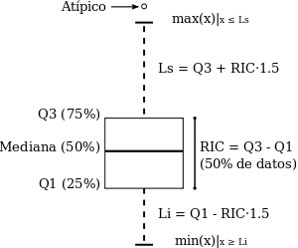

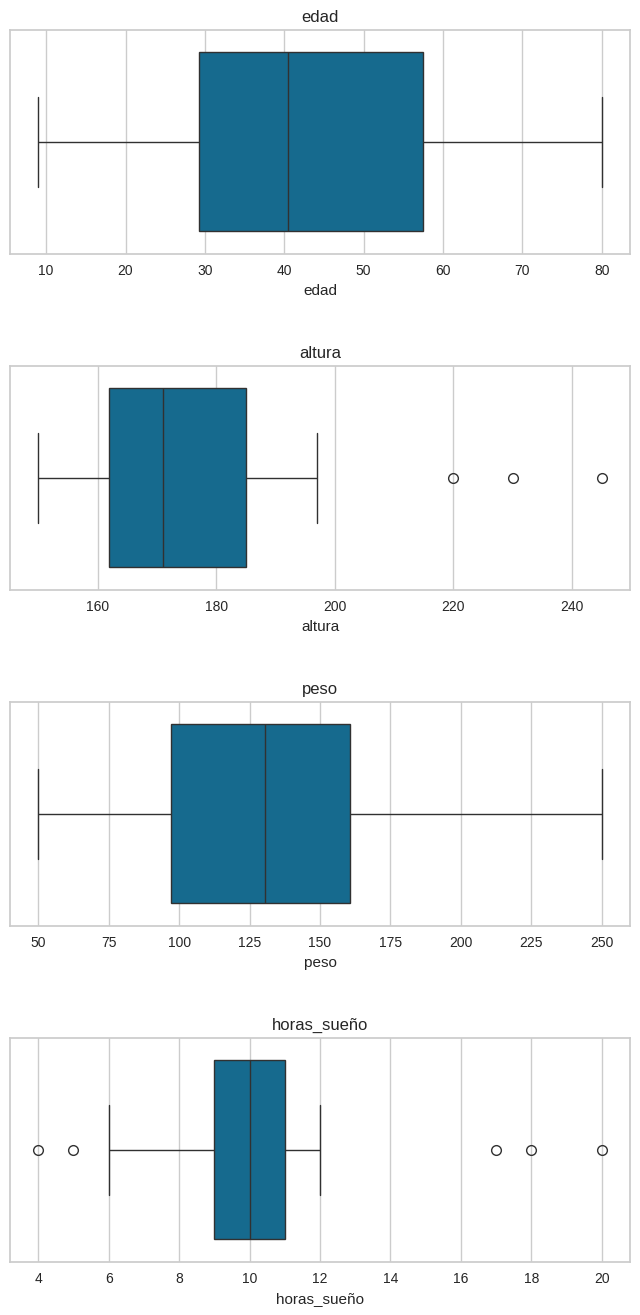

In [ ]:
# graficando para ver outliers

# Seleccionar todas las columnas numéricas automáticamente
cols_num = df_02.select_dtypes(include=['float64', 'int64']).columns

# Configuración de la figura para los gráficos
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, len(cols_num) * 4))
fig.subplots_adjust(hspace=0.5)

# Graficar cada columna numérica
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_02, ax=ax[i])
    ax[i].set_title(col)

plt.show()


In [ ]:
df_outliers = df_02.copy()
print("copia realizada")

copia realizada


Hemos podido observar que hay outliers en las siguientes columnas numericas:
*   altura
*   horas de sueño

El paso siguiente es decidir que hacer con esos valores atipicos, dejarlos o borrarlos, todo dependera de nuestro objetivo.

Para eliminar los outliers (valores atípicos) de todas las columnas numéricas en un DataFrame, puedes aplicar un método como el rango intercuartílico (IQR), que es una técnica común para detectar outliers. Esto implica identificar los valores que están por debajo del primer cuartil (Q1) o por encima del tercer cuartil (Q3), extendidos por 1.5 veces la amplitud intercuartílica (Q3 - Q1).

##Para eliminar los outliers

In [ ]:
#   ELIMINANDO OUTLIERS

# Lista de columnas a excluir
# columnas_excluir = ['columna_a_excluir_1', 'columna_a_excluir_2']  # Reemplaza con los nombres de las columnas que quieres excluir

# Seleccionar todas las columnas numéricas, excluyendo las que indiques
cols_num = df_02.select_dtypes(include=['float64', 'int64']).columns.difference(columnas_excluir)

# Eliminar outliers para cada columna numérica
for col in cols_num:
    # Calcular el rango intercuartílico (IQR)
    Q1 = df_02[col].quantile(0.25)
    Q3 = df_02[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los datos eliminando los outliers
    df_02 = df_02[(df_02[col] >= limite_inferior) & (df_02[col] <= limite_superior)]

print("Outliers eliminados de las columnas numéricas (excepto las excluidas).")


Outliers eliminados de las columnas numéricas (excepto las excluidas).


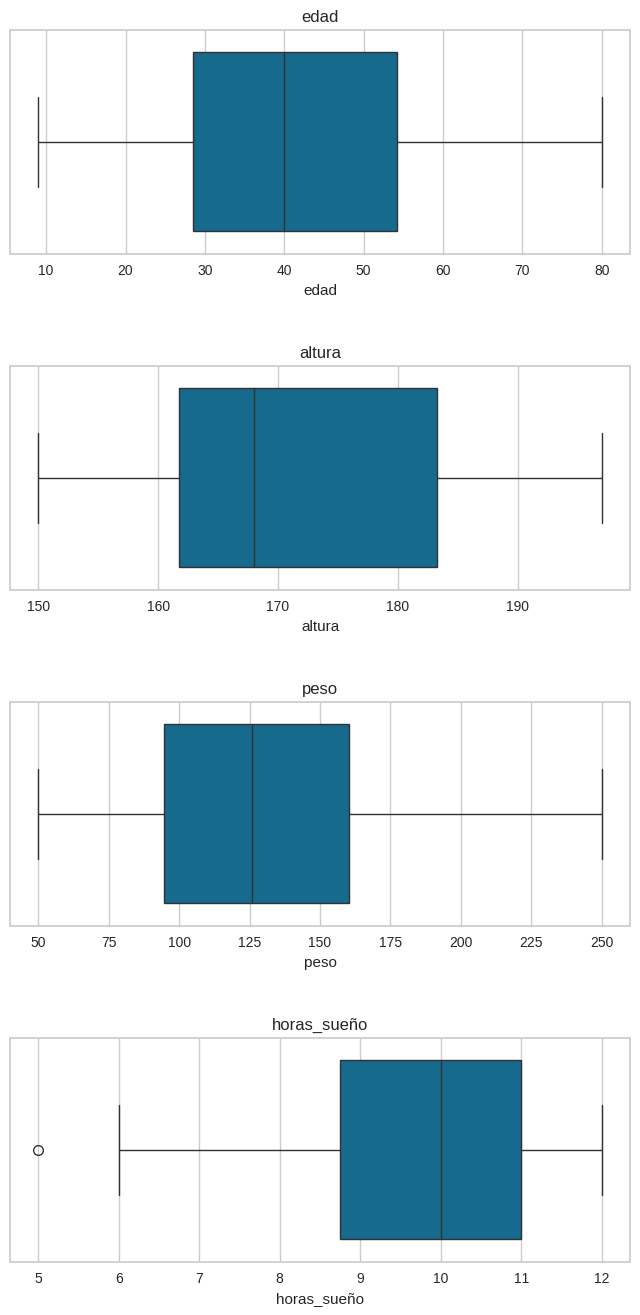

In [ ]:
# graficando para ver outliers

# Seleccionar todas las columnas numéricas automáticamente
cols_num = df_02.select_dtypes(include=['float64', 'int64']).columns

# Configuración de la figura para los gráficos
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, len(cols_num) * 4))
fig.subplots_adjust(hspace=0.5)

# Graficar cada columna numérica
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_02, ax=ax[i])
    ax[i].set_title(col)

plt.show()

Vemos que queda algun outliers en horas de sueño, esto lo podemos resolver eliminando la fila en cuestion o el propio valor.

Como siempre, hay que tener muy claro que hacer con los datos antes de eliminar, si son representativos, si realmente queremos dejarlos o por la contra pueden distorsionar las relaciones.

##Eliminacion con comparaciones: < > == >= <= !=

In [ ]:
# Eliminar filas con horas de sueño menor o igual a 6
print(f'Tamaño del set antes de eliminar registros de edad: {df_02.shape}')
df_02 = df_02[df_02['horas_sueño']>=6] # no esta confundido, quedaran las filas con >= 6
print(f'Tamaño del set después de eliminar registros de edad: {df_02.shape}')

Tamaño del set antes de eliminar registros de edad: (52, 14)
Tamaño del set después de eliminar registros de edad: (51, 14)


In [ ]:
df_02.info()
df_02.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 57
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   edad          51 non-null     int64 
 1   sexo          51 non-null     object
 2   estado salud  51 non-null     object
 3   ingresos      51 non-null     object
 4   deporte       51 non-null     object
 5   educacion     51 non-null     object
 6   altura        51 non-null     int64 
 7   peso          51 non-null     int64 
 8   lugar_comida  51 non-null     object
 9   tipo_comida   51 non-null     object
 10  alcohol       51 non-null     bool  
 11  tabaco        51 non-null     bool  
 12  horas_sueño   51 non-null     int64 
 13  ocupacion     51 non-null     object
dtypes: bool(2), int64(4), object(8)
memory usage: 5.3+ KB


,edad,sexo,estado salud,ingresos,deporte,educacion,altura,peso,lugar_comida,tipo_comida,alcohol,tabaco,horas_sueño,ocupacion
15,58,mujer,Malo,Medio,No,Secundaria,166,147,casa,Hamburguesa,False,True,11,estresante
48,33,mujer,Malo,Bajo,Sí,Primaria,162,93,restaurante,Vegetariana,True,True,12,sedentaria
9,43,mujer,Malo,Medio,Sí,Primaria,173,109,trabajo,Italiana,True,True,10,estresante
46,49,mujer,Malo,Medio,Sí,Universitaria,197,110,trabajo,Arabe,True,True,9,sedentaria
52,60,mujer,Malo,Alto,Sí,Secundaria,159,110,trabajo,Italiana,True,False,10,estresante
24,25,hombre,Malo,Bajo,Sí,Primaria,155,186,casa,China,True,True,9,sedentaria
34,15,hombre,Malo,Alto,No,Universitaria,178,113,casa,Tradicional,False,True,7,sedentaria
49,44,hombre,Normal,Medio,No,Postgrado,171,126,trabajo,Tradicional,True,False,6,sedentaria
26,51,hombre,Excelente,Medio,Sí,Primaria,183,53,restaurante,Pizza,True,True,8,estresante
8,40,hombre,Normal,Bajo,Sí,Postgrado,189,175,casa,Tradicional,False,False,11,activo


##Pasemos a graficar las categoricas

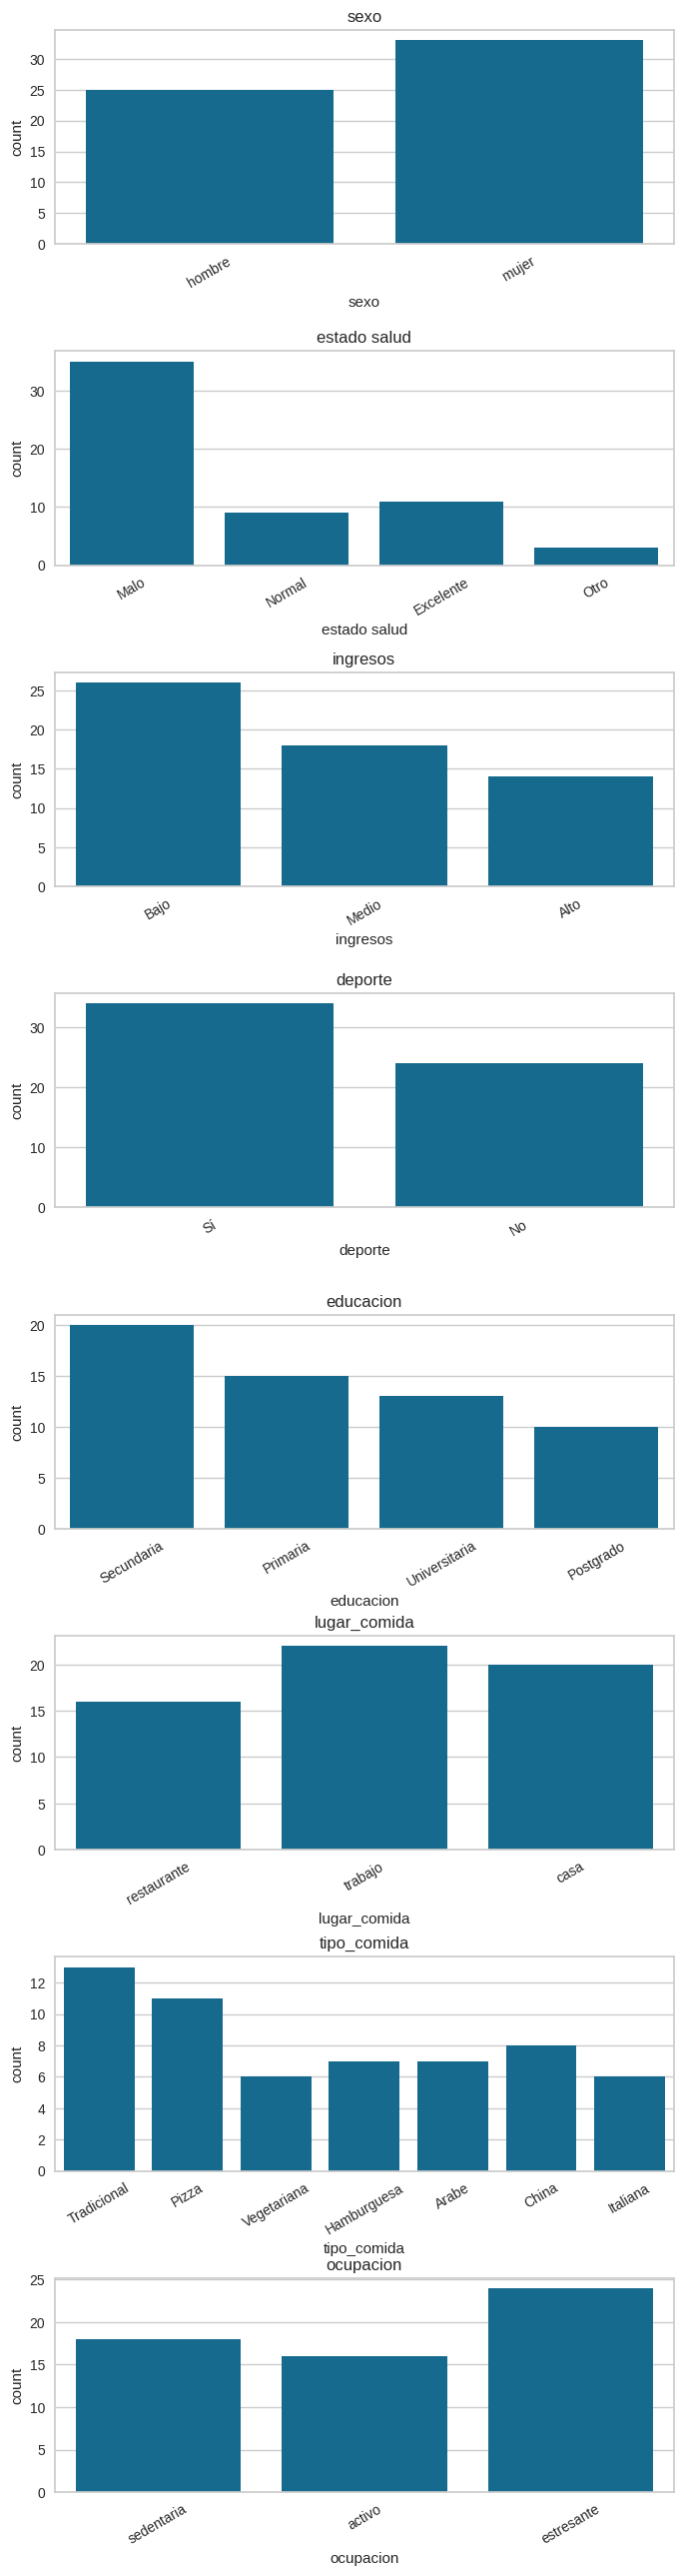

In [ ]:
# graficando para ver outliers

# Seleccionar todas las columnas object automáticamente
cols_num = df_02.select_dtypes(include=['object']).columns

# Configuración de la figura para los gráficos
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, len(cols_num) * 4))
fig.subplots_adjust(hspace=0.5)

# Graficar cada columna object
for i, col in enumerate(cols_num):
    sns.countplot(x=col, data=df_02, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

plt.show()



Con esta representacion grafica podemos observar que no hay subcategorias repetidas, bien sea por algun caracter tipografico, anglicismo o cualquier otro motivo.

De la misma forma vemos que no podemos unificar columnas para reducir categorias.

Para esto vamos a utilizar una copia del dataframe sin quitar outliers llamada df_outliers


# Otro metodo para detectar outliers

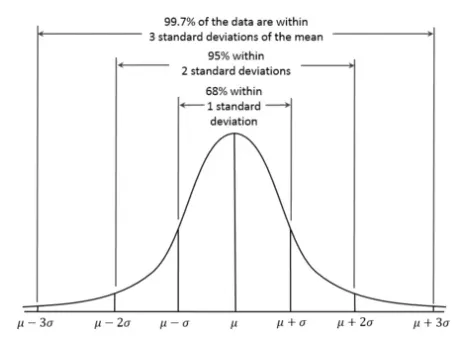

Utilizado para distribuciones normales o simetricas.
Detección de valores extremos usando el método de la desviación estándar

Este método se puede usar cuando los datos tienen una distribución normal (forma de campana Gaussiana), para lo cual se pueden aplicar diferentes pruebas estadísticas que permiten realizar esta comprobación.

La distribución Gaussiana se caracteriza por la media (𝜇) y la desviación estándar (𝜎). Conociendo los parámetros de esta distribución podemos establecer una serie de umbrales dentro de los cuales se encontrarán distriubidos nuestros datos, así:

*   En el rango 𝜇±𝜎 tendremos el 68% de los datos
*   En el rango 𝜇±2𝜎 tendremos el 95% de los datos
*   En el rango 𝜇±3𝜎 tendremos el 99.7% de los datos

Así que si, por ejemplo, tomamos como criterio el rango 𝜇±3𝜎 (donde se encuentra la gran mayoría de los datos), podemos etiquetar a un dato como valor extremo si se encuentra por fuera de este rango.


##Visualizando la distribucion de los datos

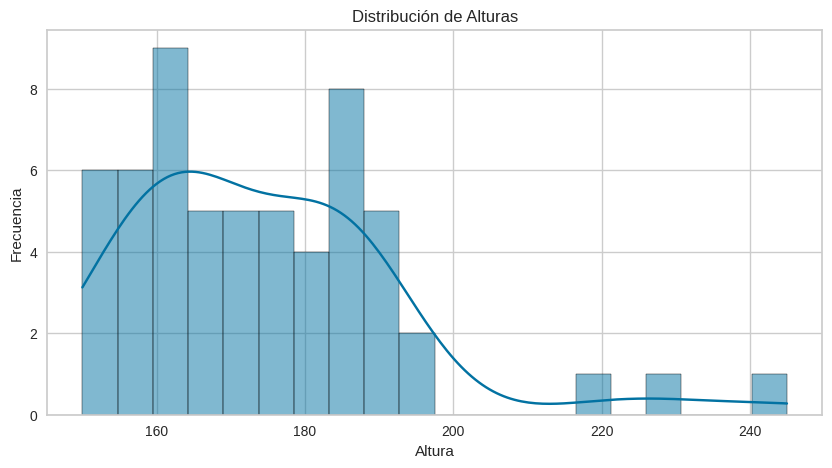

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df_outliers, x='altura', bins=20, kde=True)
plt.title('Distribución de Alturas')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()


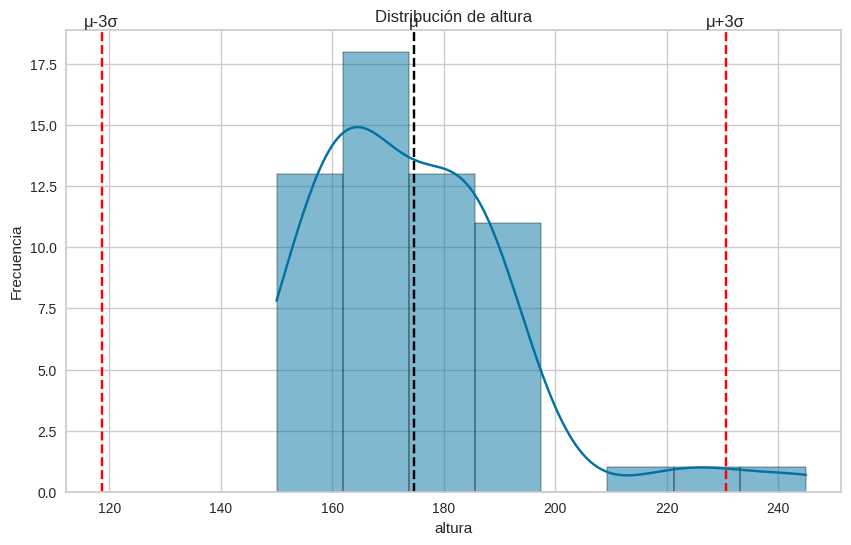

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Asumiendo que df_02 es tu DataFrame y 'columna' es la columna que quieres visualizar

columna = 'altura' # solo columnas numericas

# Calcular la media y desviación estándar
mean_alturas = df_outliers[columna].mean()
std_alturas = df_outliers[columna].std()
lim_inf = mean_alturas - 3*std_alturas
lim_sup = mean_alturas + 3*std_alturas

# Crear el histograma con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_outliers, x=columna, kde=True)

# Añadir líneas verticales
plt.axvline(x=mean_alturas, color='black', linestyle='--', label='μ')
plt.axvline(x=lim_inf, color='red', linestyle='--', label='μ-3σ')
plt.axvline(x=lim_sup, color='red', linestyle='--', label='μ+3σ')

# Añadir anotaciones
plt.text(mean_alturas, plt.ylim()[1], 'μ', ha='center', va='bottom')
plt.text(lim_inf, plt.ylim()[1], 'μ-3σ', ha='center', va='bottom')
plt.text(lim_sup, plt.ylim()[1], 'μ+3σ', ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Distribución de ' + columna)
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()






Hasta aqui se han visualizado los datos numericos.

Ahora observaremos los datos categoricos

Hay varios tipos, debemos de buscar la forma de representarlos donde nos muestre la mejor comprension
Podemos visualizar tanto datos numericos como categoricos

<Axes: xlabel='sexo', ylabel='tabaco'>

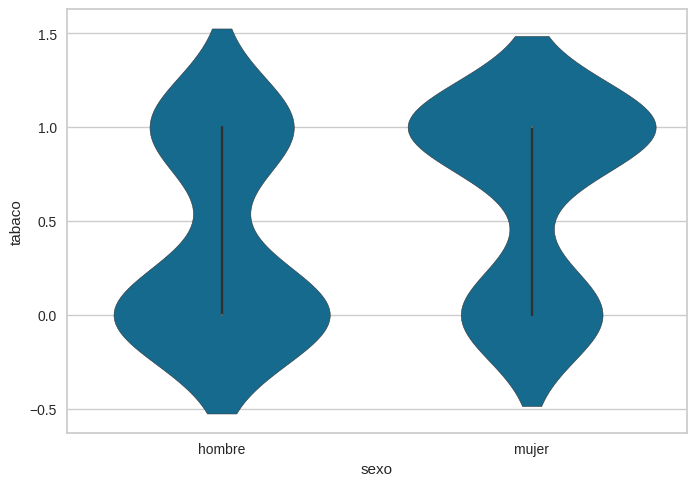

In [ ]:
#sns.barplot(x='sexo', y='altura', data=df_02)
sns.violinplot(x='sexo',  y='tabaco', data=df_outliers)



<Axes: xlabel='sexo', ylabel='altura'>

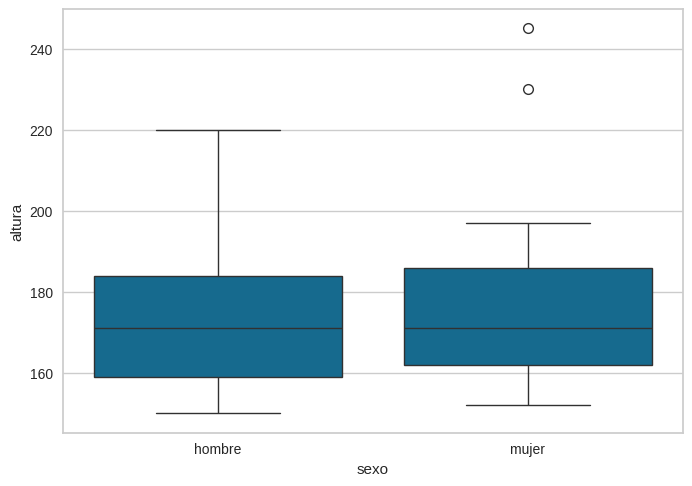

In [ ]:
sns.boxplot(x='sexo', y='altura', data=df_outliers)


<Axes: xlabel='sexo', ylabel='altura'>

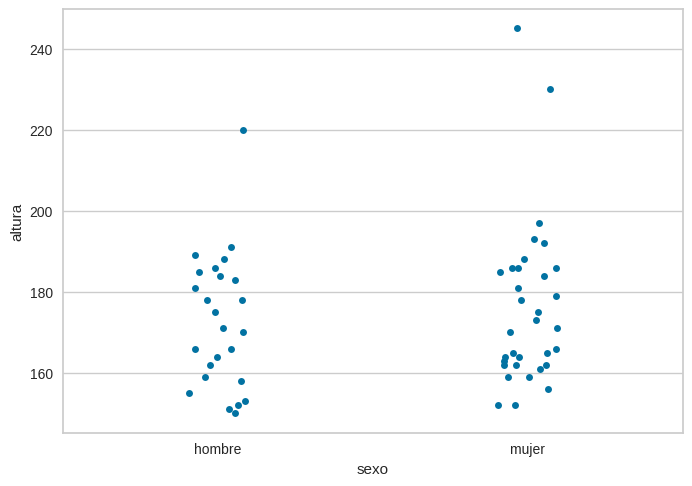

In [ ]:
sns.stripplot(x='sexo', y='altura', data=df_outliers)


##La ultima opcion es pasar los datos outliers a datos cercanos a nuestro limites intercuartilicos. Esta opcion es para no eliminar datos pero que no den distorsiones al resto.  

In [ ]:
# Cambiar el valor de los OUTLIERS a valores dentro de los limites intercuartilicos
# Asumiendo que tu DataFrame se llama 'df_02' y la columna que quieres procesar es 'altura'

def limitar_outliers_iqr(df, columna):
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Crear una nueva columna con los valores limitados
    df[f'{columna}_limitado'] = df[columna].clip(lower=limite_inferior, upper=limite_superior)

    return df

# Aplicar la función a tu DataFrame
df_limitado = limitar_outliers_iqr(df_02, 'altura')

# Verificar los resultados
print(df_limitado[['altura', 'altura_limitado']].describe())



           altura  altura_limitado
count   58.000000        58.000000
mean   174.586207       173.956897
std     18.661373        16.642601
min    150.000000       150.000000
25%    162.000000       162.000000
50%    171.000000       171.000000
75%    185.000000       185.000000
max    245.000000       219.500000


## recolectar los outliers

La ultima opcion es realmente recolectar los outliers, ya que pueden ser nuestro dato objetivo, por ejemplo, de todos los miles de visitantes de nuestra web solo unos pocos compran nuestro producto, estos outliers son el publico objetivo, son nuestros clientes, son los que compran.

Asi que la ultima opcion es realizar un dataframe con nuestros outliers.

In [ ]:
# crear un dataframe de OUTLIERS

def get_outliers(df, columns):
    df_outliers = pd.DataFrame()

    for col in columns:
        # Calcular Q1, Q3 e IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Añadir outliers al DataFrame de outliers
        df_outliers = pd.concat([df_outliers, outliers])

    # Eliminar duplicados (filas que son outliers en múltiples columnas)
    df_outliers = df_outliers.drop_duplicates()

    return df_outliers

# Usar la función
# Asumiendo que df_02 es tu DataFrame original
# y que quieres buscar outliers en todas las columnas numéricas

# Seleccionar columnas numéricas
numeric_columns = df_02.select_dtypes(include=[np.number]).columns

# Crear DataFrame de outliers
df_outliers = get_outliers(df_02, numeric_columns)

# Mostrar información sobre los outliers
print(f"Número de outliers encontrados: {len(df_outliers)}")
print("\nPrimeras filas de df_outliers:")
print(df_outliers.head())

# Opcional: guardar df_outliers en un archivo CSV
# df_outliers.to_csv('outliers.csv', index=False)


Número de outliers encontrados: 7

Primeras filas de df_outliers:
    edad    sexo estado salud ingresos deporte      educacion  altura  peso  \
14    56  hombre       Normal     Alto      Sí  Universitaria     220    95   
29    18   mujer         Malo     Bajo      Sí     Secundaria     230   134   
54    38   mujer    Excelente     Bajo      Sí     Secundaria     245   188   
17    63   mujer         Malo     Alto      No      Postgrado     193   143   
31    71   mujer         Otro     Alto      Sí     Secundaria     184   173   

   lugar_comida  tipo_comida  alcohol  tabaco  horas_sueño   ocupacion  \
14         casa  Vegetariana     True    True           18  estresante   
29      trabajo  Hamburguesa    False    True           10  estresante   
54  restaurante  Tradicional    False   False           11  sedentaria   
17      trabajo  Tradicional     True   False           20  sedentaria   
31      trabajo        Pizza     True    True            4  estresante   

    altura_lim

# RESUMEN
Para detectar outliers es necesario la visualizacion de los datos, observar los rangos y sobre todo ser criticos.

Podemos tener varios motivos de outliers:
*   Error al introducir los datos. (edad de persona de 180 años)
*   Valores extremos que desvirtuan el total de las metricas del conjunto (sueldos de 1000€ contra alguno de 300000€), que son datos reales

Que hacemos cuando encontramos outliers:
*   Eliminarlos
 *  Metodo intercuartilico, cuando los datos son asimetricos
 *  Metodo de desviacion estandar, cuando los datos son simetricos
*   Pasarlos a los limites intercuartilicos
*   Dejarlos, no hacer nada
*   Usarlos, son nuestro dato objetivo

